# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
exam_data = pd.read_csv('exams.csv')
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


# Checking for null values 

In [42]:
exam_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [44]:
exam_data.duplicated().sum()

0

<font face ='Arial' color='green' size='4'>
there are no null values or duplicates in the data
</font>

In [4]:
for index, key in enumerate(exam_data):
    print(exam_data[key].value_counts())
    print()
    if index >= 4:
        break 


gender
male      508
female    492
Name: count, dtype: int64

race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64

parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

lunch
standard        660
free/reduced    340
Name: count, dtype: int64

test preparation course
none         656
completed    344
Name: count, dtype: int64



# Education backgrounds

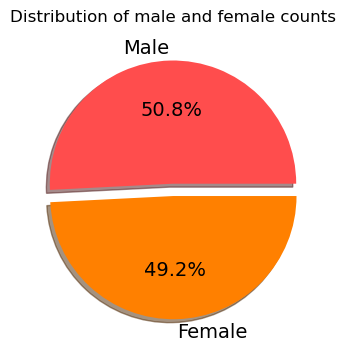

In [5]:
plt.figure(figsize=(4,4))
#sns.set(style='whitegrid')
gender_counts = exam_data.gender.value_counts()
plt.title('Distribution of male and female counts')
plt.pie(x=exam_data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})
plt.show()

The gender is almost equally distributed 

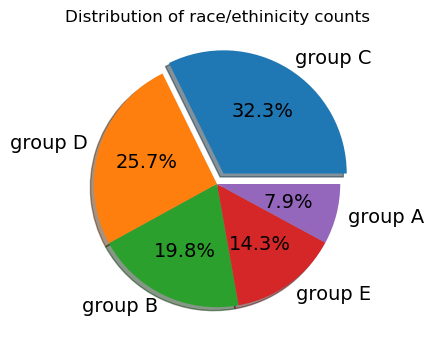

In [6]:
plt.figure(figsize=(4,4))
gender_counts = exam_data.gender.value_counts()
plt.title('Distribution of race/ethinicity counts')
plt.pie(x=exam_data['race/ethnicity'].value_counts(), labels=exam_data['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
plt.show()

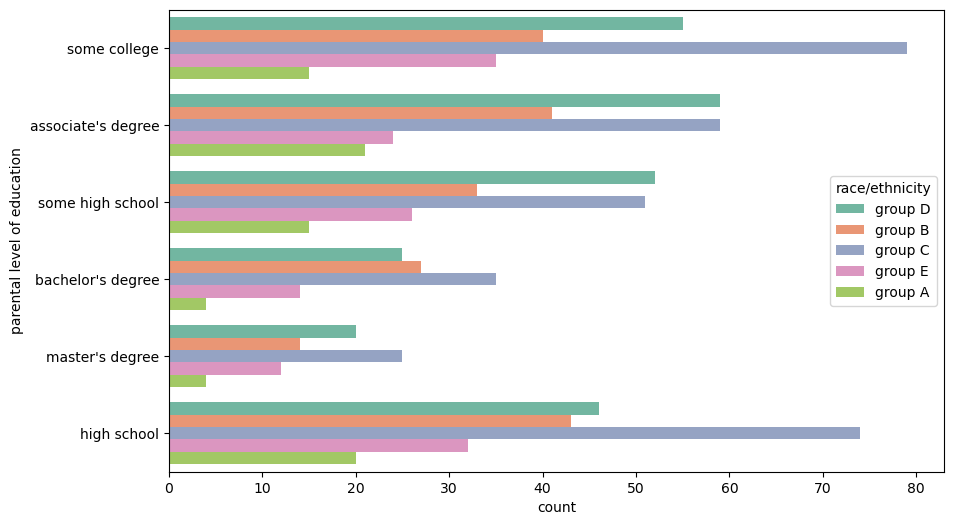

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(y='parental level of education', hue='race/ethnicity', data=exam_data, palette='Set2')
plt.show()

In various levels of education, Group C stands out as one of the most educated, particularly evident in categories such as 'some college' and 'high school'.

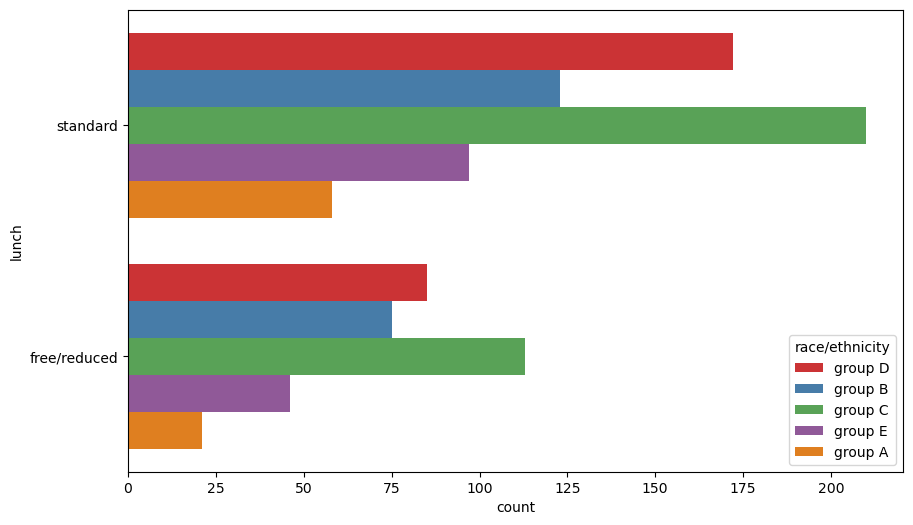

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(y='lunch', hue='race/ethnicity', data=exam_data, palette='Set1')
plt.show()

In [9]:
import warnings 
warnings.filterwarnings("ignore")

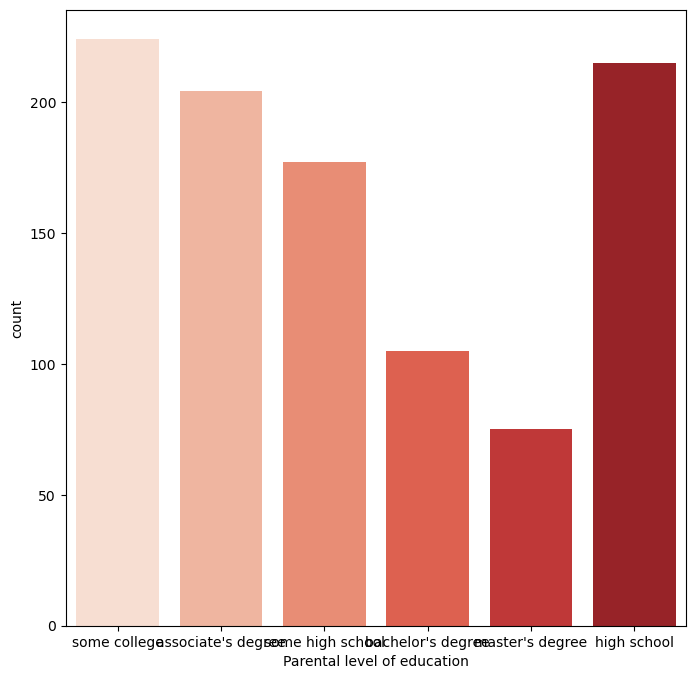

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x=exam_data['parental level of education'], data=exam_data ,palette='Reds')
plt.xlabel('Parental level of education')
plt.ylabel('count')
plt.show()

# Analysing scores 

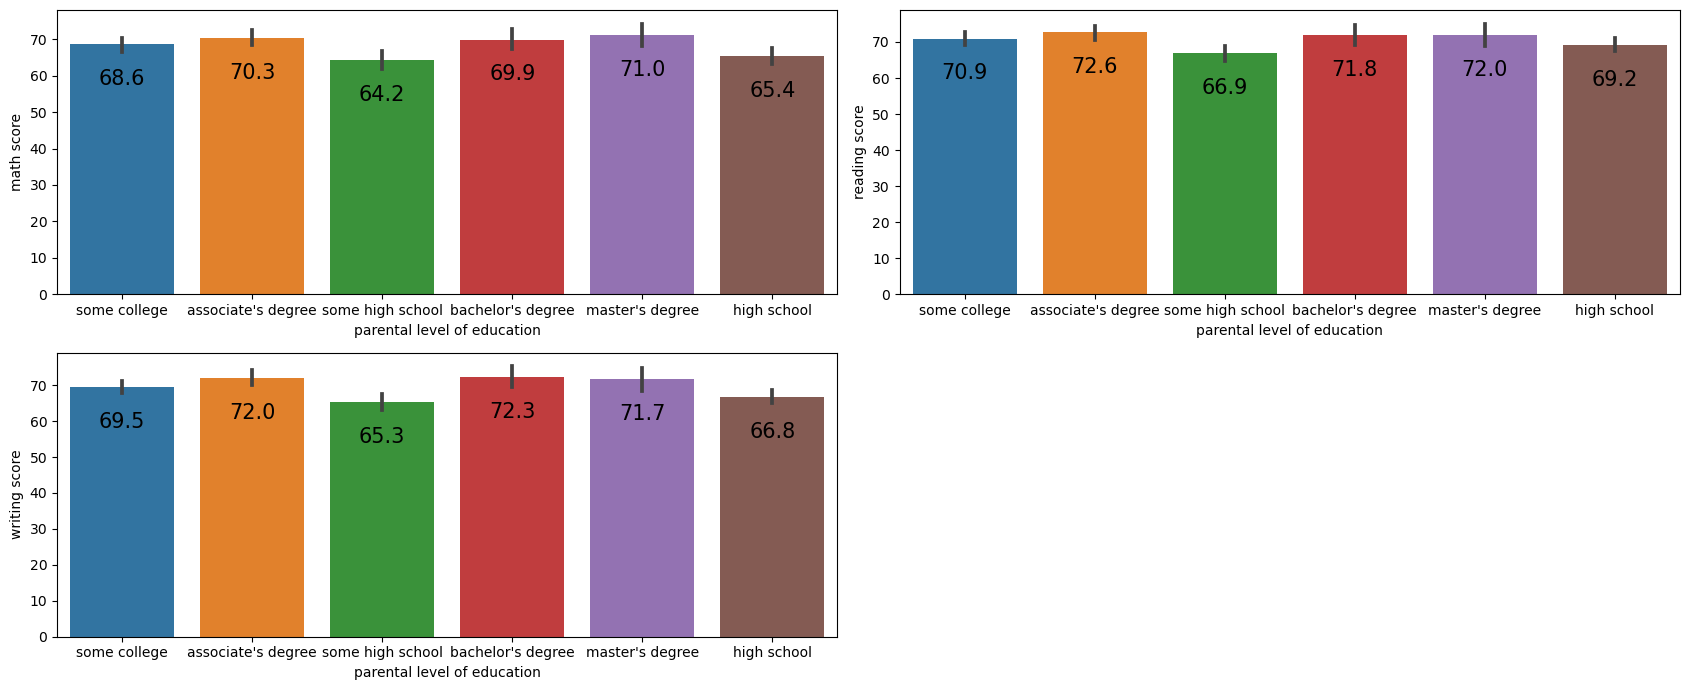

In [11]:
#sub plots with parental education 
fig,axes = plt.subplots(2,2, figsize=(17,7))
sns.barplot(x='parental level of education',y='math score',data=exam_data, ax=axes[0,0],edgecolor=None)
sns.barplot(x='parental level of education', y='reading score', data=exam_data, ax=axes[0,1])
sns.barplot(x='parental level of education',y='writing score',data=exam_data, ax=axes[1,0])
axes[1, 1].axis('off')
for ax in axes.flatten():            # to get labels on the barcharts 
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=15, color='black', xytext=(0,-25),
                    textcoords='offset points')
plt.tight_layout()
plt.show()

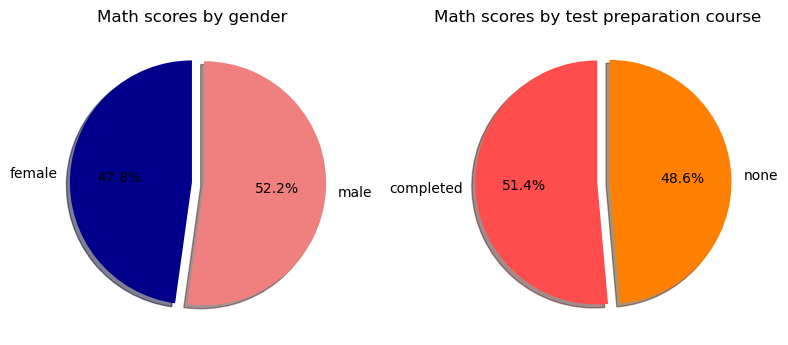

In [12]:
avg_scores = exam_data.groupby('gender')['math score'].mean()
avg_scores_course = exam_data.groupby('test preparation course')['math score'].mean()
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.pie(avg_scores, labels=avg_scores.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, startangle=90, colors=['darkblue', 'lightcoral'])
plt.title('Math scores by gender')

plt.subplot(1, 2, 2)
plt.pie(avg_scores_course, labels=avg_scores_course.index, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, startangle=90, colors=['#ff4d4d', '#ff8000'])
plt.title('Math scores by test preparation course')
plt.tight_layout()
plt.show()

There's minimal variation observed between completing the course and not completing it. Similarly, the difference in math scores between males and females is also marginal, with males slightly scoring higher on average.

# Model Training 

In [16]:
# defining independent and dependent variables
X = exam_data.drop('math score',axis=1)
y = exam_data['math score']


In [17]:
num_features = X.select_dtypes(exclude='object').columns #numerical features 
cat_features = X.select_dtypes(include='object').columns #categorial features 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([('OneHotEncoder',cat_transformer,cat_features),('StandardScalar',num_transformer,num_features),])
X=preprocessor.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((800, 19), (200, 19))

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# creating an evaluate function for model training to fit many models and chose the best
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square
    

In [28]:
# create a dictionary that maps the model and names

models ={
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # train the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate train and test datasets
    
    train_mae,train_mse,train_rmse,train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance on training set')
    print(f'Root mean square error is {train_rmse}')
    print(f'mean square error is {train_mse}')
    print(f'mean absolute error is {train_mae}')
    print(f'R2 score is {train_r2}')
    
    print('')
    print('Model performace on testing set')
    print(f'Root mean square error is {test_rmse}')
    print(f'mean square error is {test_mse}')
    print(f'mean absolute error is {test_mae}')
    print(f'R2 score is {test_r2}')
    
    print('----------------------------------------')
    

Linear Regression
Model performance on training set
Root mean square error is 5.475590810731067
mean square error is 29.9820947265625
mean absolute error is 4.396015625
R2 score is 0.8721586370344049

Model performace on testing set
Root mean square error is 4.992889964270442
mean square error is 24.9289501953125
mean absolute error is 4.0759375
R2 score is 0.8870786836284714
----------------------------------------
K-Neighbors Regressor
Model performance on training set
Root mean square error is 5.719908216046828
mean square error is 32.71735
mean absolute error is 4.53325
R2 score is 0.8604957173683788

Model performace on testing set
Root mean square error is 6.472681051928945
mean square error is 41.8956
mean absolute error is 5.15
R2 score is 0.8102244071607722
----------------------------------------
Decision Tree
Model performance on training set
Root mean square error is 0.0
mean square error is 0.0
mean absolute error is 0.0
R2 score is 1.0

Model performace on testing set
Roo

# Hyperparameter Tuning 

In [32]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
#defining parameters for each model 

param_grid ={
    
    'Linear Regression':{},
    'K-Neighbors Regressor': {'n_neighbors':[3,5,7]},
    'Decision Tree':{'max_depth':[3,5,7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    'Random Forest Regressor':{'n_estimators':[8,16,32,64,128,256],'max_depth':[3,5,7]},
    
}
model_list =[]
for model_name, model in models.items():
    scorer = make_scorer(r2_score)
    
    #perform grid search to find the best hyperparameters
    
    grid_search = GridSearchCV(model,param_grid[model_name],scoring=scorer,cv=5,n_jobs=-1)
    grid_search.fit(X_train,y_train)
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    
    #evaluating models 
    
    train_mae,train_mse,train_rmse,train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2 = evaluate_model(y_test,y_test_pred)
    print(model_name)
    print('')
    model_list.append(model_name)
    print('best hyperparameters are: ', grid_search.best_params_)
    print('Model performance for training set')
    print('')
    print(f'Root Mean Square Error: {train_rmse}')
    print(f'mean square error is {train_mse}')
    print(f'mean absolute error is {train_mae}')
    print(f'R2 score is {train_r2}')
    print('')
    print('Model performace on testing set')
    print(f'Root mean square error is {test_rmse}')
    print(f'mean square error is {test_mse}')
    print(f'mean absolute error is {test_mae}')
    print(f'R2 score is {test_r2}')
    
    print('----------------------------------------')
    
    


Linear Regression

best hyperparameters are:  {}
Model performance for training set

Root Mean Square Error: 5.475590810731067
mean square error is 29.9820947265625
mean absolute error is 4.396015625
R2 score is 0.8721586370344049

Model performace on testing set
Root mean square error is 4.992889964270442
mean square error is 24.9289501953125
mean absolute error is 4.0759375
R2 score is 0.8870786836284714
----------------------------------------
K-Neighbors Regressor

best hyperparameters are:  {'n_neighbors': 7}
Model performance for training set

Root Mean Square Error: 5.785427682495716
mean square error is 33.47117346938776
mean absolute error is 4.591428571428572
R2 score is 0.8572814716446934

Model performace on testing set
Root mean square error is 6.327853877411958
mean square error is 40.04173469387755
mean absolute error is 4.973571428571429
R2 score is 0.8186219092257495
----------------------------------------
Decision Tree

best hyperparameters are:  {'criterion': 'poiss

# Model Selection

<font face='Arial' color='blue' size='4'>
We choose the Linear Regression Model as it yeilded good R2 scores as compared to other regression models.<br>
0.87 on the training data <br>
0.88 on the testing data<br>
    </font>

In [34]:
final_model = LinearRegression()
final_model.fit(X_train,y_train)


LinearRegression()

In [35]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

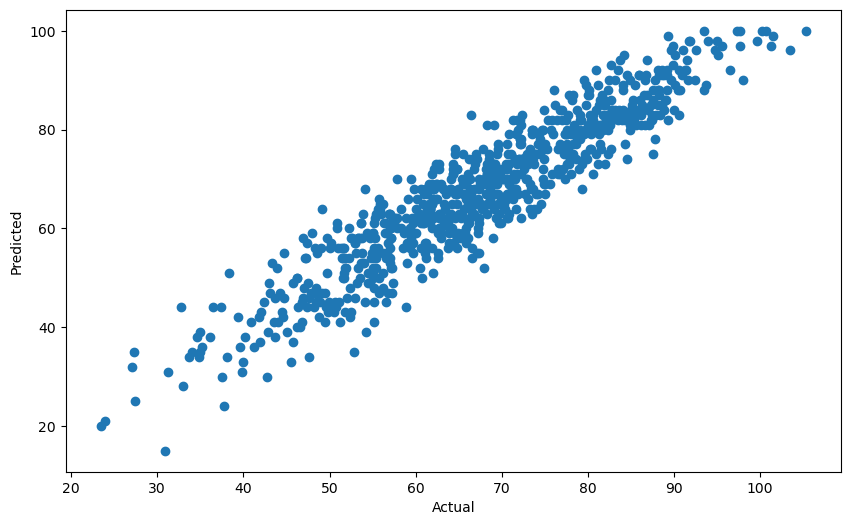

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y_train_pred,y_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: title={'center': 'Regression Line on Training set'}, xlabel='math score'>

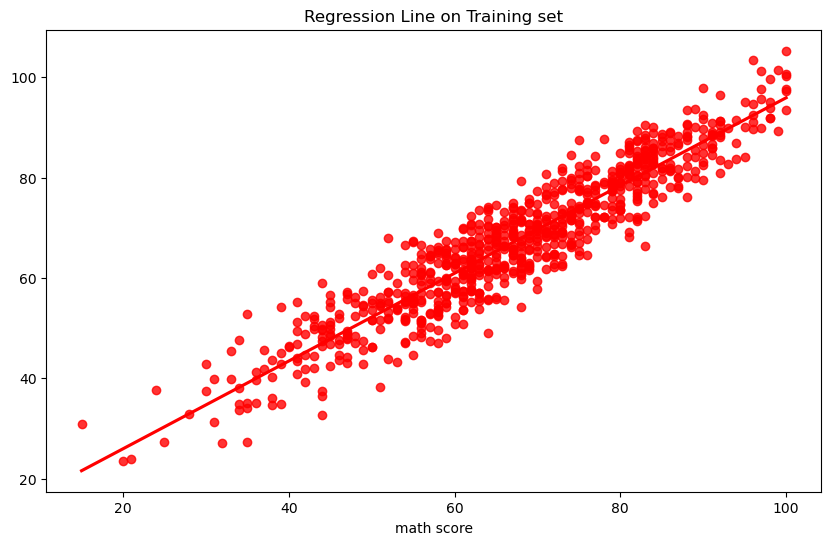

In [40]:
plt.figure(figsize=(10,6))
plt.title('Regression Line on Training set')
sns.regplot(x=y_train, y=y_train_pred,color='red',ci=None)

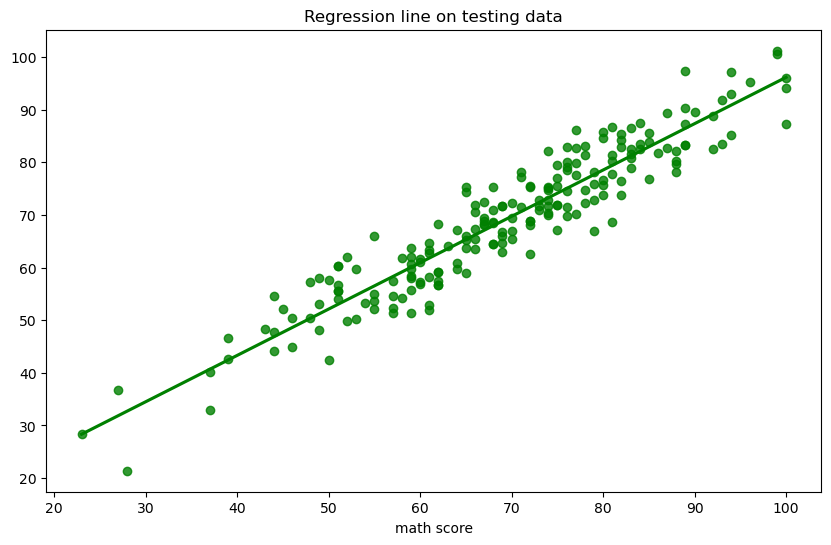

In [41]:
plt.figure(figsize=(10,6))
plt.title('Regression line on testing data')
sns.regplot(x=y_test, y=y_test_pred,ci=None,color='green')
plt.show()

In [46]:
# importing to pickle
import pickle
with open ('final_model_pkl','wb') as files:
    pickle.dump(final_model,files)
    
with open('final_model_pkl' , 'rb') as f:
    lr = pickle.load(f) 
